In [15]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


In [16]:
data_reg=pd.read_excel('data_reg.xlsx')
data_class=pd.read_excel('data_class.xlsx')
data_reg_prep=pd.read_excel('data_reg_prep.xlsx')
data_class_prep=pd.read_excel('data_class_prep.xlsx')

data_reg_temp = data_reg.drop("SalePrice",axis = 1)
cols_temp = ["OverallQual","OverallCond","IsRemodGar","IsRemod"]
data_reg_temp[cols_temp]=data_reg_temp[cols_temp].astype("object")

cat_cols = data_reg_temp.select_dtypes(include = "object").columns.tolist()
print(len(cat_cols))
print(cat_cols)

num_cols = data_reg_temp.select_dtypes(include="number").columns.tolist()
print(len(num_cols))
print(num_cols)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_reg_temp,data_reg["SalePrice"],test_size =0.3,random_state=0)
Xtrain = Xtrain.sort_index()
Xtest = Xtest.sort_index()
Ytrain= Ytrain.sort_index()
Ytest = Ytest.sort_index()

Xtrain_index = Xtrain.index.tolist()
Xtest_index = Xtest.index.tolist()

Xtrain_cat = Xtrain[cat_cols]

Xtrain_num = Xtrain[num_cols]
train_mean= Xtrain_num.mean()
train_std = np.sqrt(Xtrain_num.var())

Xtest_cat = Xtest[cat_cols]
Xtest_num = Xtest[num_cols]

Xtrain_num_std = Xtrain_num.apply(lambda x: (x - x.mean()) / np.sqrt(x.var())) 
Xtest_num_std = Xtest_num.copy()
for i in num_cols:
    Xtest_num_std[i] = (Xtest_num_std[i] - train_mean[i]) / train_std[i]

#axis = 0 caculate the mean or var through columns ,which is the default value in apply
# data_num_nor = data_num[numeric_cols].apply(lambda x: (x - x.min()) / (x.max(axis=0) - x.min(axis=0)))

#dummy的话最好一起dummy，因为有可能 test dataset 没有一些分类，导致train和test 的dummy的维度不一致

cat_dummy = data_reg_temp[cat_cols].copy()
for i in cat_cols:
    dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
    cat_dummy = pd.concat([cat_dummy,dummy_df], axis=1)
    cat_dummy = cat_dummy.drop(i, axis = 1)
print(cat_dummy.shape) 

Xtest_cat_dummy = cat_dummy.iloc[Xtest_index,:]
Xtrain_cat_dummy = cat_dummy.iloc[Xtrain_index,:]

Xtrain_lr = pd.concat((Xtrain_num_std,Xtrain_cat_dummy),axis = 1)
Xtest_lr = pd.concat((Xtest_num_std,Xtest_cat_dummy),axis = 1)
Ytrain_lr = Ytrain
Ytest_lr = Ytest

Xtrain_tree = pd.concat((Xtrain_num,Xtrain_cat),axis = 1)
Xtest_tree = pd.concat((Xtest_num,Xtest_cat),axis = 1)
Ytrain_tree = data_class.iloc[Xtrain_index,:]["PriceLevel"]
Ytest_tree = data_class.iloc[Xtest_index,:]["PriceLevel"]

20
['MSZoning', 'LotShape', 'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior1st', 'MasVnrType', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'IsRemodGar', 'IsRemod']
9
['LotArea', 'YearBuilt', 'MasVnrArea', 'Fireplaces', 'GarAreaPerCar', 'GrLivAreaPerRoom', 'TotalHouseSF', 'TotalFullBath', 'TotalPorchSF']
(2930, 125)


C:\Users\T480S\AppData\Local\Temp\ipykernel_34240\353927329.py:48: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_34240\353927329.py:48: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_34240\353927329.py:48: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_34240\353927329.py:48: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when pas

In [4]:

data_class_prep = pd.read_excel('data_class_prep.xlsx')
X = data_class_prep.loc[:,data_class_prep.columns!="PriceLevel"]
Y = data_class_prep["PriceLevel"]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.3)
Xtrain

,LotArea,YearBuilt,MasVnrArea,Fireplaces,GarAreaPerCar,GrLivAreaPerRoom,TotalHouseSF,TotalFullBath,TotalPorchSF,MSZoning_A (agr),...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemodGar_0,IsRemodGar_1,IsRemod_0,IsRemod_1
983,-0.173594,0.451100,-0.565943,-0.924985,-2.998258,-1.408965,-1.094385,0.003171,-0.827403,0,...,0,0,0,0,1,0,1,0,1,0
1893,-0.171056,-0.243221,1.147052,0.618413,0.139074,0.815786,0.562852,0.003171,0.667016,0,...,0,0,0,0,1,0,1,0,0,1
1236,-0.302654,-0.309347,-0.565943,-0.924985,-0.053008,-0.385269,-0.413090,0.003171,-0.827403,0,...,0,0,0,0,1,0,0,1,0,1
1128,0.060543,1.178484,1.068679,0.618413,-0.437171,0.119922,0.961932,0.003171,0.286450,0,...,0,0,0,0,1,0,1,0,1,0
1187,0.114477,-0.110970,-0.565943,0.618413,-0.018084,-0.305800,1.160850,-1.323966,0.954762,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0.965363,-0.408536,0.172996,2.161811,0.075047,0.275763,0.479555,-1.323966,1.400303,0,...,0,0,0,0,1,0,1,0,1,0
332,-1.047957,0.021282,-0.565943,-0.924985,0.331156,-0.286295,-1.129195,-1.323966,-0.233348,0,...,0,0,0,0,1,0,1,0,1,0
1496,-0.396436,1.112359,-0.565943,-0.924985,-0.373143,-0.112909,-0.350928,0.003171,-0.233348,0,...,0,0,0,0,1,0,1,0,1,0
625,0.577039,-0.177095,0.609642,2.161811,0.156536,1.772656,0.724473,1.330308,3.368110,0,...,0,0,0,0,1,0,1,0,0,1


In [17]:
clf =SVC(kernel="linear").fit(Xtrain_lr,Ytrain_tree)
clf.predict(Xtest_lr)
print(clf.score(Xtest_lr,Ytest_tree))
print(clf.support_vectors_.shape)
print(clf.n_support_)

0.7929465301478953
(1072, 134)
[319 212 394 147]


In [20]:
from sklearn.model_selection import cross_val_score
clf_scores=[]
clf_cv_scores = []
kernel =["linear","poly","rbf","sigmoid"]
for i in kernel:
    clf =SVC(kernel = i
             ,gamma = "auto"
             ,cache_size=9000 #unit:MB use how much memory to run
             ).fit(Xtrain_lr,Ytrain_tree) 
    #clf.predict(Xtest)
    clf_scores.append(clf.score(Xtest_lr,Ytest_tree))
    clf_cv = cross_val_score(clf,Xtrain_lr,Ytrain_tree,cv = 5).mean()
    clf_cv_scores.append(clf_cv)



In [21]:
print(clf_scores)
print(clf_cv_scores)

[0.7929465301478953, 0.5176336746302617, 0.7929465301478953, 0.7815699658703071]
[0.7464589638597117, 0.5129119933535102, 0.7410990445670882, 0.7284267995964632]


In [28]:
clf_cv_scores


[0.7703071672354949,
 0.5491467576791809,
 0.7556313993174062,
 0.7433447098976109]

0.7519908987485779 0.020235896477251554


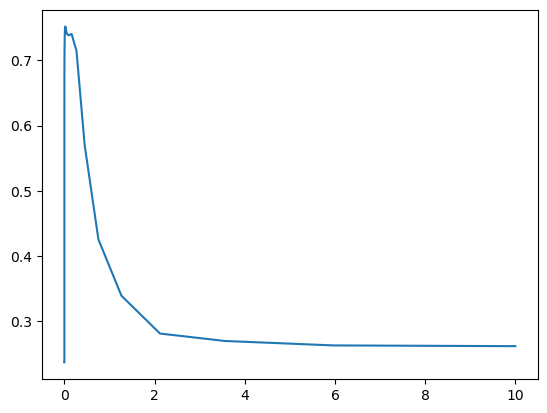

In [29]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=8000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

# C parameter

0.7519908987485779 0.6220408163265306


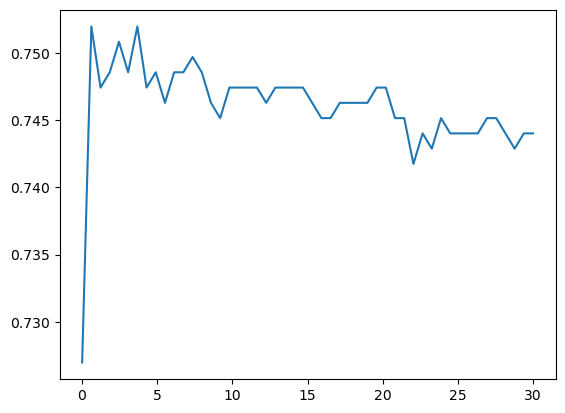

In [30]:
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=8000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.7588168373151308 12.250816326530613


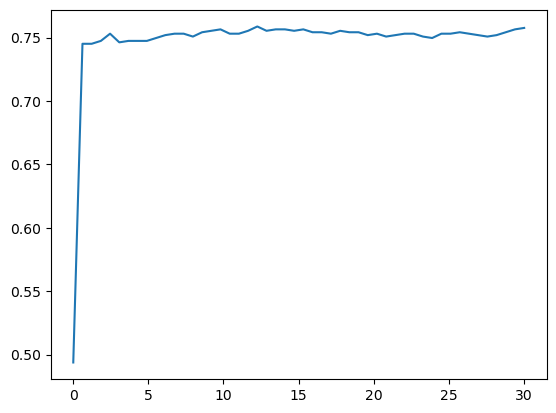

In [31]:
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 
0.020235896477251554,cache_size=8000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [5]:
clf = SVC(kernel="rbf",C=12.250816326530613,gamma = 
0.020235896477251554,cache_size=8000,probability=True).fit(Xtrain,Ytrain)

clf.score(Xtest,Ytest)
print(clf.predict_proba(Xtrain))


[[3.29139608e-03 9.62549107e-01 3.39488320e-02 2.10664503e-04]
 [4.56602655e-01 7.46773668e-03 1.06602791e-01 4.29326818e-01]
 [7.90991200e-03 1.83944020e-01 8.07285899e-01 8.60168898e-04]
 ...
 [6.10812668e-01 1.54678620e-02 3.58112435e-01 1.56070351e-02]
 [1.54783969e-01 3.29531480e-03 3.11186458e-02 8.10802071e-01]
 [2.90527338e-03 8.12642939e-01 1.83716117e-01 7.35670811e-04]]


In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics.pairwise import euclidean_distances

# clf = SVC(kernel='rbf', C=12.250816326530613, gamma=0.020235896477251554, cache_size=8000)
# clf.fit(Xtrain, Ytrain)

# predictions = clf.predict(Xtest)
# print(predictions)
# # 设置距离阈值
# distance_threshold = 0.1  # 根据您的数据调整阈值大小
# print(clf.support_vectors_.shape)

# # 获取每个样本点到决策函数的距离
# print("每个样本点到决策函数的距离",clf.decision_function(Xtrain))

# # 打印每个样本点的距离
# for i, distance in enumerate(distances):
#     print(f"样本点 {i}: 距离 = {distance}")
# # # 计算样本与预测类别之间的距离
# distances = euclidean_distances(Xtest, clf.support_vectors_)
# print(distances.shape)
# # # 判定分类是否正确
# print(distances[1, predictions[1]])



In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
Ypred = clf.predict(Xtest)
Ytrue = Ytest.copy().to_numpy()
# for i in range(len(Ytrue)):
#     if Ytrue[i] == 'Very High':
#         Ytrue[i] = 3
#     elif Ytrue[i] == 'High':
#         Ytrue[i] = 2
#     elif Ytrue[i] == 'Medium':
#         Ytrue[i] = 1
#     else:
#         Ytrue[i] = 0
        
# for i in range(len(Ypred)):
#     if Ypred[i] == 'Very High':
#         Ypred[i] = 3
#     elif Ypred[i] == 'High':
#         Ypred[i] = 2
#     elif Ypred[i] == 'Medium':
#         Ypred[i] = 1
#     else:
#         Ypred[i] = 0
unique_values, counts = np.unique(Ypred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"类别 {value} 的数量: {count}")      
cm = confusion_matrix(Ytest, Ypred)
acc = accuracy_score(Ytrue, Ypred)

acc
precision_macro = precision_score(Ytrue, Ypred, average='macro')
precision_micro = precision_score(Ytrue, Ypred, average='micro')

recall_macro = recall_score(Ytrue, Ypred, average='macro')
recall_micro = recall_score(Ytrue, Ypred, average='micro')

f1_macro = f1_score(Ytrue, Ypred, average='macro')
f1_micro = f1_score(Ytrue, Ypred, average='micro')

recall_macro = recall_score(Ytrue, Ypred, average='macro')
recall_micro = recall_score(Ytrue, Ypred, average='micro')

# auc_macro = roc_auc_score(Ytrue, Ypred,average='macro')
# auc_micro = roc_auc_score(Ytrue, Ypred,average='micro')

print(acc)
print("macro ",precision_macro,"micro",precision_micro)
print("macro ",recall_macro,"micro",recall_micro)
print("macro ",f1_macro,"micro",f1_micro)
# print("macro ",auc_macro,"micro",auc_micro)



类别 High 的数量: 227
类别 Low 的数量: 202
类别 Medium 的数量: 239
类别 Very High 的数量: 211
0.7633674630261661
macro  0.7694855401093909 micro 0.7633674630261661
macro  0.763575641273329 micro 0.7633674630261661
macro  0.765706845919544 micro 0.7633674630261661


In [7]:
print(type(Ytrue),type(Ypred))
# for i in range(len(Ytrue)):
#     if Ytrue[i] == 'Very High':
#         Ytrue[i] = 3
#     elif Ytrue[i] == 'High':
#         Ytrue[i] = 2
#     elif Ytrue[i] == 'Medium':
#         Ytrue[i] = 1
#     else:
#         Ytrue[i] = 0
        
# for i in range(len(Ypred)):
#     if Ypred[i] == 'Very High':
#         Ypred[i] = 3
#     elif Ypred[i] == 'High':
#         Ypred[i] = 2
#     elif Ypred[i] == 'Medium':
#         Ypred[i] = 1
#     else:
#         Ypred[i] = 0
y_pred = clf.predict_proba(Xtest)    
auc_macro = roc_auc_score(Ytrue, y_pred,average='macro',multi_class='ovo')
auc_micro = roc_auc_score(Ytrue, y_pred,average='micro',multi_class='ovr')
print("macro ",auc_macro,"micro",auc_micro)



<class 'numpy.ndarray'> <class 'numpy.ndarray'>
macro  0.9410009027741447 micro 0.946856301956536


In [8]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Ytrain)

y_onehot_test = label_binarizer.transform(Ytest)
y_onehot_test.shape  # (n_samples, n_classes)

print(y_onehot_test)

[[0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]]


In [9]:
class_of_interest = "Medium"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

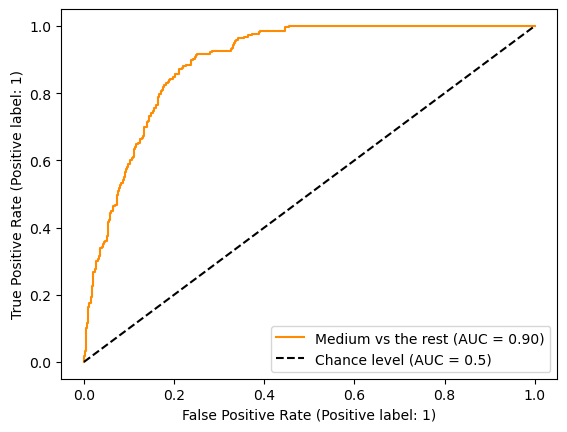

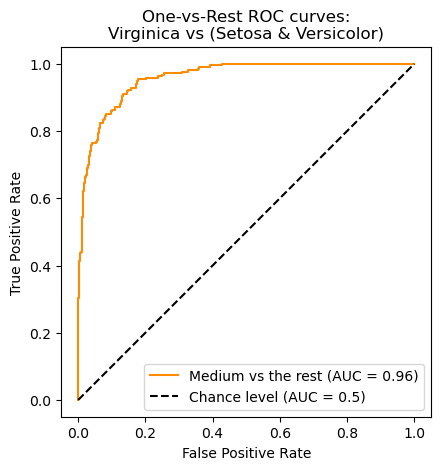

In [11]:
from sklearn.metrics import RocCurveDisplay
y_score = clf.predict_proba(Xtest)
RocCurveDisplay.from_predictions(
    y_onehot_test[:, 2],
    y_score[:, 2],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True
)
RocCurveDisplay.from_predictions(
    y_onehot_test[:, 1],
    y_score[:, 1],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [13]:
y_onehot_test.ravel()

array([0, 0, 1, ..., 1, 0, 0])

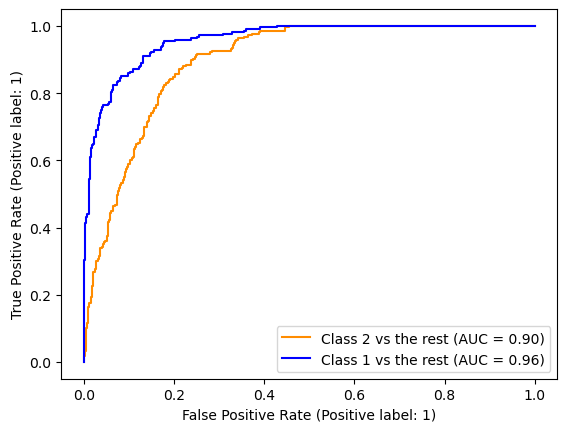

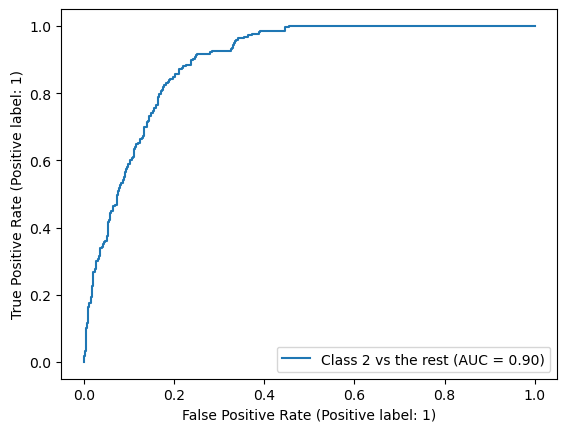

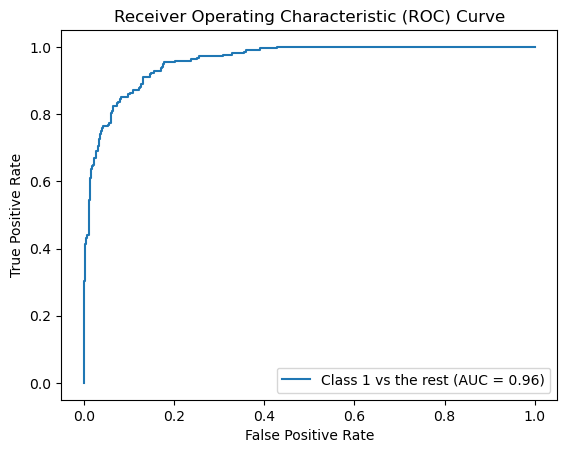

In [12]:
# Calculate y_scores for class 2
y_score_class_2 = clf.predict_proba(Xtest)[:, 2]
# Calculate y_scores for class 1
y_score_class_1 = clf.predict_proba(Xtest)[:, 1]

# Create figure and axes
fig, ax = plt.subplots()

# Plot ROC curve for class 2
roc_display_class_2 = RocCurveDisplay.from_predictions(
    y_onehot_test[:, 2],
    y_score_class_2,
    name="Class 2 vs the rest",
    color="darkorange",
    ax=ax
)
roc_display_class_2.plot()

# Plot ROC curve for class 1
roc_display_class_1 = RocCurveDisplay.from_predictions(
    y_onehot_test[:, 1],
    y_score_class_1,
    name="Class 1 vs the rest",
    color="blue",
    ax=ax
)
roc_display_class_1.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show the legend
plt.legend()

# Display the plot
plt.show()